In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib.colors import Normalize
import pandas as pd
from scipy.interpolate import splprep, splev
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import metpy.calc as mpcalc
from metpy.units import units
from scipy.ndimage import binary_erosion, generic_filter
import matplotlib.cm as cm
from pandas import DataFrame, Index
import os
from scipy.ndimage import uniform_filter

In [2]:
#predictions NWP#
#initialized at 00
NWP_pred_00_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T00Z.nc')
NWP_pred_00_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T00Z.nc')
NWP_pred_00_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T00Z.nc')
NWP_pred_00_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T00Z.nc')
#initialized at 06#
NWP_pred_06_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T06Z.nc')
NWP_pred_06_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T06Z.nc')
NWP_pred_06_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T06Z.nc')
NWP_pred_06_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T06Z.nc')
#initialized at 12#
NWP_pred_12_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T12Z.nc')
NWP_pred_12_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T12Z.nc')
NWP_pred_12_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T12Z.nc')
NWP_pred_12_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T12Z.nc')
#initialized at 18#
NWP_pred_18_0507 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/05/meps_det_2_5km_20230705T18Z.nc')
NWP_pred_18_0407 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/04/meps_det_2_5km_20230704T18Z.nc')
NWP_pred_18_0307 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/03/meps_det_2_5km_20230703T18Z.nc')
NWP_pred_18_0207 = xr.open_dataset('https://thredds.met.no/thredds/dodsC/meps25epsarchive/2023/07/02/meps_det_2_5km_20230702T18Z.nc')
#ground-truth DDM--> it is equal to prediction but we will select just the prediction step-0#
#time 00 
NWP_gt_00_0507 = NWP_pred_00_0507
#time 06
NWP_gt_06_0507 = NWP_pred_06_0507
#time 12
NWP_gt_12_0507 = NWP_pred_12_0507
#time 18
NWP_gt_18_0507 = NWP_pred_18_0507

# NWP #
inputs_POLY_NWP = [
    (NWP_pred_18_0407, NWP_gt_00_0507, 6, '05/07/2023 00 UTC'),
    (NWP_pred_12_0407, NWP_gt_00_0507, 12, '05/07/2023 00 UTC'),
    (NWP_pred_06_0407, NWP_gt_00_0507, 18, '05/07/2023 00 UTC'),
    (NWP_pred_00_0407, NWP_gt_00_0507, 24, '05/07/2023 00 UTC'),
    (NWP_pred_18_0307, NWP_gt_00_0507, 30, '05/07/2023 00 UTC'),
    (NWP_pred_12_0307, NWP_gt_00_0507, 36, '05/07/2023 00 UTC'),
    (NWP_pred_06_0307, NWP_gt_00_0507, 42, '05/07/2023 00 UTC'),
    (NWP_pred_00_0307, NWP_gt_00_0507, 48, '05/07/2023 00 UTC'),
    (NWP_pred_18_0207, NWP_gt_00_0507, 54, '05/07/2023 00 UTC'),
    (NWP_pred_12_0207, NWP_gt_00_0507, 60, '05/07/2023 00 UTC'),
    (NWP_pred_06_0207, NWP_gt_00_0507, 66, '05/07/2023 00 UTC'),

    (NWP_pred_00_0507, NWP_gt_06_0507, 6, '05/07/2023 06 UTC'),
    (NWP_pred_18_0407, NWP_gt_06_0507, 12, '05/07/2023 06 UTC'),
    (NWP_pred_12_0407, NWP_gt_06_0507, 18, '05/07/2023 06 UTC'),
    (NWP_pred_06_0407, NWP_gt_06_0507, 24, '05/07/2023 06 UTC'),
    (NWP_pred_00_0407, NWP_gt_06_0507, 30, '05/07/2023 06 UTC'),
    (NWP_pred_18_0307, NWP_gt_06_0507, 36, '05/07/2023 06 UTC'),
    (NWP_pred_12_0307, NWP_gt_06_0507, 42, '05/07/2023 06 UTC'),
    (NWP_pred_06_0307, NWP_gt_06_0507, 48, '05/07/2023 06 UTC'),
    (NWP_pred_00_0307, NWP_gt_06_0507, 54, '05/07/2023 06 UTC'),
    (NWP_pred_18_0207, NWP_gt_06_0507, 60, '05/07/2023 06 UTC'),
    (NWP_pred_12_0207, NWP_gt_06_0507, 66, '05/07/2023 06 UTC'),

    (NWP_pred_06_0507, NWP_gt_12_0507, 6, '05/07/2023 12 UTC'),
    (NWP_pred_00_0507, NWP_gt_12_0507, 12, '05/07/2023 12 UTC'),
    (NWP_pred_18_0407, NWP_gt_12_0507, 18, '05/07/2023 12 UTC'),
    (NWP_pred_12_0407, NWP_gt_12_0507, 24, '05/07/2023 12 UTC'),
    (NWP_pred_06_0407, NWP_gt_12_0507, 30, '05/07/2023 12 UTC'),
    (NWP_pred_00_0407, NWP_gt_12_0507, 36, '05/07/2023 12 UTC'),
    (NWP_pred_18_0307, NWP_gt_12_0507, 42, '05/07/2023 12 UTC'),
    (NWP_pred_12_0307, NWP_gt_12_0507, 48, '05/07/2023 12 UTC'),
    (NWP_pred_06_0307, NWP_gt_12_0507, 54, '05/07/2023 12 UTC'),
    (NWP_pred_00_0307, NWP_gt_12_0507, 60, '05/07/2023 12 UTC'),
    (NWP_pred_18_0207, NWP_gt_12_0507, 66, '05/07/2023 12 UTC'),
 
    (NWP_pred_12_0507, NWP_gt_18_0507, 6, '05/07/2023 18 UTC'),
    (NWP_pred_06_0507, NWP_gt_18_0507, 12, '05/07/2023 18 UTC'),
    (NWP_pred_00_0507, NWP_gt_18_0507, 18, '05/07/2023 18 UTC'),
    (NWP_pred_18_0407, NWP_gt_18_0507, 24, '05/07/2023 18 UTC'),
    (NWP_pred_12_0407, NWP_gt_18_0507, 30, '05/07/2023 18 UTC'),
    (NWP_pred_06_0407, NWP_gt_18_0507, 36, '05/07/2023 18 UTC'),
    (NWP_pred_00_0407, NWP_gt_18_0507, 42, '05/07/2023 18 UTC'),
    (NWP_pred_18_0307, NWP_gt_18_0507, 48, '05/07/2023 18 UTC'),
    (NWP_pred_12_0307, NWP_gt_18_0507, 54, '05/07/2023 18 UTC'),
    (NWP_pred_06_0307, NWP_gt_18_0507, 60, '05/07/2023 18 UTC'),
    (NWP_pred_00_0307, NWP_gt_18_0507, 66, '05/07/2023 18 UTC')
]

In [3]:

data_dir_DDM = 'C:/Users/User/Documents/Master_Thesis/DATA/DDM_output'
nc_files = [f for f in os.listdir(data_dir_DDM) if f.endswith('.nc')]
nc_files.sort()

data_DDM = {}
for file_name in nc_files:
    file_path = os.path.join(data_dir_DDM, file_name)
    data_DDM[file_name] = xr.open_dataset(file_path)
    #print(f"Uploaded: {file_name}")

# Predictions DDM
# Initialized at 00
DDM_pred_00_0507 = data_DDM['20230705T00Z.nc']
DDM_pred_00_0407 = data_DDM['20230704T00Z.nc']
DDM_pred_00_0307 = data_DDM['20230703T00Z.nc']
DDM_pred_00_0207 = data_DDM['20230702T00Z.nc']
# Initialized at 06
DDM_pred_06_0507 = data_DDM['20230705T06Z.nc']
DDM_pred_06_0407 = data_DDM['20230704T06Z.nc']
DDM_pred_06_0307 = data_DDM['20230703T06Z.nc']
DDM_pred_06_0207 = data_DDM['20230702T06Z.nc']
# Initialized at 12
DDM_pred_12_0507 = data_DDM['20230705T12Z.nc']
DDM_pred_12_0407 = data_DDM['20230704T12Z.nc']
DDM_pred_12_0307 = data_DDM['20230703T12Z.nc']
DDM_pred_12_0207 = data_DDM['20230702T12Z.nc']
# Initialized at 18
DDM_pred_18_0507 = data_DDM['20230705T18Z.nc']
DDM_pred_18_0407 = data_DDM['20230704T18Z.nc']
DDM_pred_18_0307 = data_DDM['20230703T18Z.nc']
DDM_pred_18_0207 = data_DDM['20230702T18Z.nc']

# Ground-truth DDM
# Time 00 
DDM_gt_00_0507 = DDM_pred_00_0507
# Time 06
DDM_gt_06_0507 = DDM_pred_06_0507
# Time 12
DDM_gt_12_0507 = DDM_pred_12_0507
# Time 18
DDM_gt_18_0507 = DDM_pred_18_0507

# DDM inputs
inputs_POLY_DDM = [
    (DDM_pred_18_0407, DDM_gt_00_0507, 1, '05/07/2023 00 UTC'),
    (DDM_pred_12_0407, DDM_gt_00_0507, 2, '05/07/2023 00 UTC'),
    (DDM_pred_06_0407, DDM_gt_00_0507, 3, '05/07/2023 00 UTC'),
    (DDM_pred_00_0407, DDM_gt_00_0507, 4, '05/07/2023 00 UTC'),
    (DDM_pred_18_0307, DDM_gt_00_0507, 5, '05/07/2023 00 UTC'),
    (DDM_pred_12_0307, DDM_gt_00_0507, 6, '05/07/2023 00 UTC'),
    (DDM_pred_06_0307, DDM_gt_00_0507, 7, '05/07/2023 00 UTC'),
    (DDM_pred_00_0307, DDM_gt_00_0507, 8, '05/07/2023 00 UTC'),
    (DDM_pred_18_0207, DDM_gt_00_0507, 9, '05/07/2023 00 UTC'),
    (DDM_pred_12_0207, DDM_gt_00_0507, 10, '05/07/2023 00 UTC'),
    (DDM_pred_06_0207, DDM_gt_00_0507, 11, '05/07/2023 00 UTC'),

    (DDM_pred_00_0507, DDM_gt_06_0507, 1, '05/07/2023 06 UTC'),
    (DDM_pred_18_0407, DDM_gt_06_0507, 2, '05/07/2023 06 UTC'),
    (DDM_pred_12_0407, DDM_gt_06_0507, 3, '05/07/2023 06 UTC'),
    (DDM_pred_06_0407, DDM_gt_06_0507, 4, '05/07/2023 06 UTC'),
    (DDM_pred_00_0407, DDM_gt_06_0507, 5, '05/07/2023 06 UTC'),
    (DDM_pred_18_0307, DDM_gt_06_0507, 6, '05/07/2023 06 UTC'),
    (DDM_pred_12_0307, DDM_gt_06_0507, 7, '05/07/2023 06 UTC'),
    (DDM_pred_06_0307, DDM_gt_06_0507, 8, '05/07/2023 06 UTC'),
    (DDM_pred_00_0307, DDM_gt_06_0507, 9, '05/07/2023 06 UTC'),
    (DDM_pred_18_0207, DDM_gt_06_0507, 10, '05/07/2023 06 UTC'),
    (DDM_pred_12_0207, DDM_gt_06_0507, 11, '05/07/2023 06 UTC'),
    
    (DDM_pred_06_0507, DDM_gt_12_0507, 1, '05/07/2023 12 UTC'),
    (DDM_pred_00_0507, DDM_gt_12_0507, 2, '05/07/2023 12 UTC'),
    (DDM_pred_18_0407, DDM_gt_12_0507, 3, '05/07/2023 12 UTC'),
    (DDM_pred_12_0407, DDM_gt_12_0507, 4, '05/07/2023 12 UTC'),
    (DDM_pred_06_0407, DDM_gt_12_0507, 5, '05/07/2023 12 UTC'),
    (DDM_pred_00_0407, DDM_gt_12_0507, 6, '05/07/2023 12 UTC'),
    (DDM_pred_18_0307, DDM_gt_12_0507, 7, '05/07/2023 12 UTC'),
    (DDM_pred_12_0307, DDM_gt_12_0507, 8, '05/07/2023 12 UTC'),
    (DDM_pred_06_0307, DDM_gt_12_0507, 9, '05/07/2023 12 UTC'),
    (DDM_pred_00_0307, DDM_gt_12_0507, 10, '05/07/2023 12 UTC'),
    (DDM_pred_18_0207, DDM_gt_12_0507, 11, '05/07/2023 12 UTC'),
    
    (DDM_pred_12_0507, DDM_gt_18_0507, 1, '05/07/2023 18 UTC'),
    (DDM_pred_06_0507, DDM_gt_18_0507, 2, '05/07/2023 18 UTC'),
    (DDM_pred_00_0507, DDM_gt_18_0507, 3, '05/07/2023 18 UTC'),
    (DDM_pred_18_0407, DDM_gt_18_0507, 4, '05/07/2023 18 UTC'),
    (DDM_pred_12_0407, DDM_gt_18_0507, 5, '05/07/2023 18 UTC'),
    (DDM_pred_06_0407, DDM_gt_18_0507, 6, '05/07/2023 18 UTC'),
    (DDM_pred_00_0407, DDM_gt_18_0507, 7, '05/07/2023 18 UTC'),
    (DDM_pred_18_0307, DDM_gt_18_0507, 8, '05/07/2023 18 UTC'),
    (DDM_pred_12_0307, DDM_gt_18_0507, 9, '05/07/2023 18 UTC'),
    (DDM_pred_06_0307, DDM_gt_18_0507, 10, '05/07/2023 18 UTC'),
    (DDM_pred_00_0307, DDM_gt_18_0507, 11, '05/07/2023 18 UTC')
]

In [14]:
labels =[
    "lt=6 t=00 UTC", "lt=12 t=00 UTC", "lt=18 t=00 UTC", "lt=24 t=00 UTC", "lt=30 t=00 UTC", "lt=36 t=00 UTC", "lt=42 t=00 UTC", "lt=48 t=00 UTC", "lt=54 t=00 UTC", "lt=60 t=00 UTC", "lt=66 t=00 UTC",
    "lt=6 t=06 UTC", "lt=12 t=06 UTC", "lt=18 t=06 UTC", "lt=24 t=06 UTC", "lt=30 t=06 UTC", "lt=36 t=06 UTC", "lt=42 t=06 UTC", "lt=48 t=06 UTC", "lt=54 t=06 UTC", "lt=60 t=06 UTC", "lt=66 t=06 UTC",
    "lt=6 t=12 UTC", "lt=12 t=12 UTC", "lt=18 t=12 UTC", "lt=24 t=12 UTC", "lt=30 t=12 UTC", "lt=36 t=12 UTC", "lt=42 t=12 UTC", "lt=48 t=12 UTC", "lt=54 t=12 UTC", "lt=60 t=12 UTC", "lt=66 t=12 UTC",
    "lt=6 t=18 UTC", "lt=12 t=18 UTC", "lt=18 t=18 UTC", "lt=24 t=18 UTC", "lt=30 t=18 UTC", "lt=36 t=18 UTC", "lt=42 t=18 UTC", "lt=48 t=18 UTC", "lt=54 t=18 UTC", "lt=60 t=18 UTC", "lt=66 t=18 UTC"
]

labels_for_graph_comparison = [
    "lt=0 \n t=00 UTC", "lt=6 \n t=00 UTC", "lt=12 \n t=00 UTC", "lt=18 \n t=00 UTC", "lt=24 \n t=00 UTC", "lt=30 \n t=00 UTC", "lt=36 \n t=00 UTC", "lt=42 \n t=00 UTC", "lt=48 \n t=00 UTC", "lt=54 \n t=00 UTC", "lt=60 \n t=00 UTC", "lt=66 \n t=00 UTC",
    "lt=0 \n t=06 UTC", "lt=6 \n t=06 UTC", "lt=12 \n t=06 UTC", "lt=18 \n t=06 UTC", "lt=24 \n t=06 UTC", "lt=30 \n t=06 UTC", "lt=36 \n t=06 UTC", "lt=42 \n t=06 UTC", "lt=48 \n t=06 UTC", "lt=54 \n t=06 UTC", "lt=60 \n t=06 UTC", "lt=66 \n t=06 UTC",
    "lt=0 \n t=12 UTC", "lt=6 \n t=12 UTC", "lt=12 \n t=12 UTC", "lt=18 \n t=12 UTC", "lt=24 \n t=12 UTC", "lt=30 \n t=12 UTC", "lt=36 \n t=12 UTC", "lt=42 \n t=12 UTC", "lt=48 \n t=12 UTC", "lt=54 \n t=12 UTC", "lt=60 \n t=12 UTC", "lt=66 \n t=12 UTC",
    "lt=0 \n t=18 UTC", "lt=6 \n t=18 UTC", "lt=12 \n t=18 UTC", "lt=18 \n t=18 UTC", "lt=24 \n t=18 UTC", "lt=30 \n t=18 UTC", "lt=36 \n t=18 UTC", "lt=42 \n t=18 UTC", "lt=48 \n t=18 UTC", "lt=54 \n t=18 UTC", "lt=60 \n t=18 UTC", "lt=66 \n t=18 UTC"
]

labels_semplified = [
    "0h", "", "", "", "24h", "", "", "", "48h", "", "", "66h",
    "0h", "", "", "", "24h", "", "", "", "48h", "", "", "66h",
    "0h", "", "", "", "24h", "", "", "", "48h", "", "", "66h",
    "0h", "", "", "", "24h", "", "", "", "48h", "", "", "66h",
]

In [5]:
#labels_for_table = [
#    "lt=6 t=00 UTC", "lt=12 t=00 UTC", "lt=18 t=00 UTC", "lt=24 t=00 UTC", "lt=30 t=00 UTC", "lt=36 t=00 UTC", "lt=42 t=00 UTC", "lt=48 t=00 UTC", "lt=54 t=00 UTC", "lt=60 t=00 UTC", "lt=66 t=00 UTC",
#    "lt=6 t=06 UTC", "lt=12 t=06 UTC", "lt=18 t=06 UTC", "lt=24 t=06 UTC", "lt=30 t=06 UTC", "lt=36 t=06 UTC", "lt=42 t=06 UTC", "lt=48 t=06 UTC", "lt=54 t=06 UTC", "lt=60 t=06 UTC", "lt=66 t=06 UTC",
#    "lt=6 t=12 UTC", "lt=12 t=12 UTC", "lt=18 t=12 UTC", "lt=24 t=12 UTC", "lt=30 t=12 UTC", "lt=36 t=12 UTC", "lt=42 t=12 UTC", "lt=48 t=12 UTC", "lt=54 t=12 UTC", "lt=60 t=12 UTC", "lt=66 t=12 UTC",
#    "lt=6 t=18 UTC", "lt=12 t=18 UTC", "lt=18 t=18 UTC", "lt=24 t=18 UTC", "lt=30 t=18 UTC", "lt=36 t=18 UTC", "lt=42 t=18 UTC", "lt=48 t=18 UTC", "lt=54 t=18 UTC", "lt=60 t=18 UTC", "lt=66 t=18 UTC"
#]

#times_ticks_05 = ['05/07 \n 00 UTC', '05/07 \n 06 UTC', '05/07 \n 12 UTC', '05/07 \n 18 UTC']

In [6]:
def calculate_rotation_angles(u_DDM, v_DDM, u_NWP, v_NWP):
    """
    Calculate the optimal rotation angles for each grid point to align DDM winds with NWP winds.
    
    Parameters:
    u_DDM (ndarray): U-component of wind from DDM
    v_DDM (ndarray): V-component of wind from DDM
    u_NWP (ndarray): U-component of wind from NWP
    v_NWP (ndarray): V-component of wind from NWP
    
    Returns:
    ndarray: Matrix of rotation angles (in radians) for each grid point
    """
    # Initialize the angle matrix
    angles = np.zeros_like(u_DDM)
    
    # Calculate angle for each grid point
    for i in range(u_DDM.shape[0]):
        for j in range(u_DDM.shape[1]):
            # Get wind components for current grid point
            u_d = u_DDM[i,j]
            v_d = v_DDM[i,j]
            u_n = u_NWP[i,j]
            v_n = v_NWP[i,j]
            
            # Calculate the angle that rotates DDM wind to NWP wind
            # Using the atan2 of the cross and dot products
            cross = u_d * v_n - v_d * u_n
            dot = u_d * u_n + v_d * v_n
            angles[i,j] = np.arctan2(cross, dot)
    
    return angles

def rotate_wind(u,v,angle_rad):
    u_rot = u*np.cos(angle_rad) - v*np.sin(angle_rad)
    v_rot = u*np.sin(angle_rad) + v*np.cos(angle_rad)
    return u_rot,v_rot

def block_average(data, factor_smoothing):
    kernel_size = 2 * factor_smoothing + 1
    smoothed_data = uniform_filter(data, size=kernel_size, mode='nearest')
    return smoothed_data


def prepare_datasets_NWP(factor_smoothing, data_pred, data_gt, lead_time, lat, lon, pl_selected):

    latitude = data_pred['latitude'][lat[0]:lat[1], lon[0]:lon[1]]
    latitude = latitude.values
    latitude_smoothed = block_average(latitude, factor_smoothing)
    longitude = data_pred['longitude'][lat[0]:lat[1], lon[0]:lon[1]]
    longitude = longitude.values
    longitude_smoothed = block_average(longitude, factor_smoothing)

    #Predictions data
    CUT_CENTRE_Phi_PRED = data_pred['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[lead_time, lat[0]:lat[1], lon[0]:lon[1]]
    Phi_pred_selected_pl = CUT_CENTRE_Phi_PRED.values 
    Phi_pred_selected_pl_smoothed = block_average(Phi_pred_selected_pl, factor_smoothing)
    CUT_CENTRE_u_PRED = data_pred['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[lead_time, lat[0]:lat[1], lon[0]:lon[1]] 
    u_pred_selected_pl = CUT_CENTRE_u_PRED.values
    u_pred_selected_pl_smoothed = block_average(u_pred_selected_pl, factor_smoothing)
    CUT_CENTRE_v_PRED = data_pred['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[lead_time, lat[0]:lat[1], lon[0]:lon[1]]
    v_pred_selected_pl = CUT_CENTRE_v_PRED.values
    v_pred_selected_pl_smoothed = block_average(v_pred_selected_pl, factor_smoothing)
    
    # Ground Truth data
    CUT_CENTRE_Phi_GT = data_gt['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[0, lat[0]:lat[1], lon[0]:lon[1]]
    Phi_gt_selected_pl = CUT_CENTRE_Phi_GT.values 
    Phi_gt_selected_pl_smoothed = block_average(Phi_gt_selected_pl, factor_smoothing)
    CUT_CENTRE_u_GT = data_gt['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[0, lat[0]:lat[1], lon[0]:lon[1]]
    u_gt_selected_pl = CUT_CENTRE_u_GT.values
    u_gt_selected_pl_smoothed = block_average(u_gt_selected_pl, factor_smoothing)
    CUT_CENTRE_v_GT = data_gt['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[0, lat[0]:lat[1], lon[0]:lon[1]]
    v_gt_selected_pl = CUT_CENTRE_v_GT.values
    v_gt_selected_pl_smoothed = block_average(v_gt_selected_pl, factor_smoothing)

    return latitude_smoothed, longitude_smoothed, Phi_pred_selected_pl_smoothed, u_pred_selected_pl_smoothed, v_pred_selected_pl_smoothed, Phi_gt_selected_pl_smoothed, u_gt_selected_pl_smoothed, v_gt_selected_pl_smoothed
    
def prepare_datasets_DDM(factor_smoothing, angles, data_pred, data_gt, lead_time, lat, lon, pl_selected):

    latitude = data_pred['latitude'][lat[0]:lat[1], lon[0]:lon[1]]
    latitude = latitude.values
    latitude_smoothed = block_average(latitude, factor_smoothing)
    longitude = data_pred['longitude'][lat[0]:lat[1], lon[0]:lon[1]]
    longitude = longitude.values
    longitude_smoothed = block_average(longitude, factor_smoothing)

    #Predictions data
    CUT_CENTRE_Phi_PRED = data_pred['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[lead_time, lat[0]:lat[1], lon[0]:lon[1]]
    Phi_pred_selected_pl = CUT_CENTRE_Phi_PRED.values 
    Phi_pred_selected_pl_smoothed = block_average(Phi_pred_selected_pl, factor_smoothing)
    CUT_CENTRE_u_PRED = data_pred['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[lead_time, lat[0]:lat[1], lon[0]:lon[1]] 
    u_pred_selected_pl = CUT_CENTRE_u_PRED.values
    CUT_CENTRE_v_PRED = data_pred['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[lead_time, lat[0]:lat[1], lon[0]:lon[1]]
    v_pred_selected_pl = CUT_CENTRE_v_PRED.values
    
    u_pred_selected_pl, v_pred_selected_pl = rotate_wind(u_pred_selected_pl,v_pred_selected_pl,angles) 
    u_pred_selected_pl_smoothed = block_average(u_pred_selected_pl, factor_smoothing)
    v_pred_selected_pl_smoothed = block_average(v_pred_selected_pl, factor_smoothing)
    
    # Ground Truth data
    CUT_CENTRE_Phi_GT = data_gt['geopotential_pl'].sel(pressure=pl_selected, method='nearest')[0, lat[0]:lat[1], lon[0]:lon[1]]
    Phi_gt_selected_pl = CUT_CENTRE_Phi_GT.values
    Phi_gt_selected_pl_smoothed = block_average(Phi_gt_selected_pl, factor_smoothing)
    CUT_CENTRE_u_GT = data_gt['x_wind_pl'].sel(pressure=pl_selected, method='nearest')[0, lat[0]:lat[1], lon[0]:lon[1]]
    u_gt_selected_pl = CUT_CENTRE_u_GT.values
    CUT_CENTRE_v_GT = data_gt['y_wind_pl'].sel(pressure=pl_selected, method='nearest')[0, lat[0]:lat[1], lon[0]:lon[1]]
    v_gt_selected_pl = CUT_CENTRE_v_GT.values
    
    u_gt_selected_pl, v_gt_selected_pl = rotate_wind(u_gt_selected_pl,v_gt_selected_pl,angles)    
    u_gt_selected_pl_smoothed = block_average(u_gt_selected_pl, factor_smoothing)
    v_gt_selected_pl_smoothed = block_average(v_gt_selected_pl, factor_smoothing)

    return latitude_smoothed, longitude_smoothed, Phi_pred_selected_pl_smoothed, u_pred_selected_pl_smoothed, v_pred_selected_pl_smoothed, Phi_gt_selected_pl_smoothed, u_gt_selected_pl_smoothed, v_gt_selected_pl_smoothed


def compute_Rossby_number(latitude, u_pred_selected_pl, v_pred_selected_pl, u_gt_selected_pl, v_gt_selected_pl):
    
    f = compute_Coriolis_marix(latitude, u_pred_selected_pl)
    
    u_PRED, v_PRED = u_pred_selected_pl, v_pred_selected_pl
    u_GT, v_GT = u_gt_selected_pl, v_gt_selected_pl
    
    du_dy_PRED, du_dx_PRED = np.gradient(u_PRED, 2500, 2500)
    dv_dy_PRED, dv_dx_PRED = np.gradient(v_PRED, 2500, 2500)
    
    du_dy_GT, du_dx_GT = np.gradient(u_GT, 2500, 2500)
    dv_dy_GT, dv_dx_GT = np.gradient(v_GT, 2500, 2500)

    # Initialize Ro_PRED and Ro_GT with default value 1000
    Ro_PRED = np.full_like(u_PRED, 1000)  # Fill with 1000 initially
    Ro_GT = np.full_like(u_GT, 1000)      # Fill with 1000 initially

    numerator_PRED = np.sqrt((u_PRED * du_dx_PRED + 
                             v_PRED * du_dy_PRED)** 2 + 
                             (u_PRED * dv_dx_PRED + 
                             v_PRED * dv_dy_PRED) ** 2)
    
    denominator_PRED = f * np.sqrt(v_PRED** 2 + u_PRED** 2)
    Ro_PRED = numerator_PRED / denominator_PRED

    numerator_GT = np.sqrt((u_GT * du_dx_GT + 
                            v_GT * du_dy_GT)**2 + 
                            (u_GT * dv_dx_GT + 
                            v_GT * dv_dy_GT) ** 2)

    denominator_GT = f  * np.sqrt(v_GT**2 + u_GT** 2)
    Ro_GT = numerator_GT / denominator_GT
    ###########################################################################################

    return Ro_PRED, Ro_GT
    

def get_geo_deviation(factor_smoothing, Ro_threshold, latitude, longitude, Phi_pred_selected_pl, u_pred_selected_pl, v_pred_selected_pl, Phi_gt_selected_pl, u_gt_selected_pl, v_gt_selected_pl):

    f = compute_Coriolis_marix(latitude, u_pred_selected_pl)
    
    # Compute the Phi gradient (Phi = Geopotential height): 
    # You take the difference between two adjacent grid points and divide by the distance in meters --> np.gradient(F, dx, dy)
    dPhi_dy_p, dPhi_dx_p = np.gradient(Phi_pred_selected_pl, 2500, 2500)
    #dPhi_dy_p = block_average(dPhi_dy_p, factor_smoothing)
    #dPhi_dx_p = block_average(dPhi_dx_p, factor_smoothing)
    dPhi_dy_gt, dPhi_dx_gt = np.gradient(Phi_gt_selected_pl, 2500, 2500)
    #dPhi_dy_gt = block_average(dPhi_dy_gt, factor_smoothing)
    #dPhi_dx_gt = block_average(dPhi_dx_gt, factor_smoothing)

    # Observed Velocities 
    u_pred = u_pred_selected_pl
    v_pred = v_pred_selected_pl
    u_gt = u_gt_selected_pl
    v_gt = v_gt_selected_pl
    
    # Computed Geostrophic Velocities 
    ug_pred = -(1/f) * dPhi_dy_p
    vg_pred = (1/f) * dPhi_dx_p
    ug_gt = -(1/f) * dPhi_dy_gt
    vg_gt = (1/f) * dPhi_dx_gt
    
    #NORMALIZED GEO DEV
    norm_GEO_DEV_PRED = np.sqrt((u_pred - ug_pred)**2 + (v_pred - vg_pred)**2) / np.mean(np.sqrt(u_pred**2 + v_pred**2))
    norm_GEO_DEV_GT = np.sqrt((u_gt - ug_gt)**2 + (v_gt - vg_gt)**2) / np.mean(np.sqrt(u_gt**2 + v_gt**2))
    
    #ABSOLUTE GEO DEV
    abs_GEO_DEV_PRED = np.sqrt((u_pred - ug_pred)**2 + (v_pred - vg_pred)**2)
    abs_GEO_DEV_GT = np.sqrt((u_gt - ug_gt)**2 + (v_gt - vg_gt)**2) 
    
    # Compute the magnitude of the geopotential gradient
    Phi_grad_pred = np.sqrt(dPhi_dx_p**2 + dPhi_dy_p**2)
    Phi_grad_gt = np.sqrt(dPhi_dx_gt**2 + dPhi_dy_gt**2)
    
    # Compute the magnitude of the speed
    speed_pred = np.sqrt(u_pred**2 + v_pred**2)
    speed_gt = np.sqrt(u_gt**2 + v_gt**2)

    return norm_GEO_DEV_PRED, norm_GEO_DEV_GT, abs_GEO_DEV_PRED, abs_GEO_DEV_GT, Phi_grad_pred, Phi_grad_gt, speed_pred, speed_gt



def compute_Coriolis_marix(latitude, u_pred_selected_pl):
    Omega = 7.2921e-5  
    latitudes_2d = np.tile(latitude[:,0], (u_pred_selected_pl.shape[1], 1)).T  
    f = 2 * Omega * np.sin(np.radians(latitudes_2d))
    return f


def compute_statistics(PRED,GT):
    predictions = PRED.flatten()
    ground_truth = GT.flatten()
    predictions = predictions[~np.isnan(predictions) & ~np.isinf(predictions)]
    ground_truth = ground_truth[~np.isnan(ground_truth) & ~np.isinf(ground_truth)]
    
    mean_pred = np.mean(predictions)
    mean_gt = np.mean(ground_truth)
    
    median_pred = np.median(predictions)
    median_gt = np.median(ground_truth)
    
    std_pred = np.std(predictions)
    std_gt = np.std(ground_truth)
    
    count_pred = np.count_nonzero(~np.isnan(PRED))
    count_gt = np.count_nonzero(~np.isnan(GT))
    
    return mean_pred, mean_gt, median_pred, median_gt, std_pred, std_gt, count_pred, count_gt

def get_statistics(factor_smoothing, Ro_threshold, angles, data_pred_NWP, data_gt_NWP, lead_time_NWP, data_pred_DDM, data_gt_DDM, lead_time_DDM, pl_selected, lat_NWP, lon_NWP, lat_DDM, lon_DDM):

    # Call 'prepare_datasets()'
    latitude_NWP, longitude_NWP, Phi_pred_selected_pl_NWP, u_pred_selected_pl_NWP, v_pred_selected_pl_NWP, Phi_gt_selected_pl_NWP, u_gt_selected_pl_NWP, v_gt_selected_pl_NWP = prepare_datasets_NWP(factor_smoothing, data_pred_NWP, data_gt_NWP, lead_time_NWP, lat_NWP, lon_NWP, pl_selected)
    latitude_DDM, longitude_DDM, Phi_pred_selected_pl_DDM, u_pred_selected_pl_DDM, v_pred_selected_pl_DDM, Phi_gt_selected_pl_DDM, u_gt_selected_pl_DDM, v_gt_selected_pl_DDM = prepare_datasets_DDM(factor_smoothing, angles, data_pred_DDM, data_gt_DDM, lead_time_DDM, lat_DDM, lon_DDM, pl_selected)
    
    # Call 'get_geo_balance_where_Ro_under_threshold()' 
    norm_DEV_PRED_NWP, norm_DEV_GT_NWP, abs_DEV_PRED_NWP, abs_DEV_GT_NWP, Phi_grad_pred_NWP, Phi_grad_gt_NWP, speed_pred_NWP, speed_gt_NWP = get_geo_deviation(factor_smoothing, Ro_threshold, latitude_NWP, longitude_NWP, Phi_pred_selected_pl_NWP, u_pred_selected_pl_NWP, v_pred_selected_pl_NWP, Phi_gt_selected_pl_NWP, u_gt_selected_pl_NWP, v_gt_selected_pl_NWP)
    norm_DEV_PRED_DDM, norm_DEV_GT_DDM, abs_DEV_PRED_DDM, abs_DEV_GT_DDM, Phi_grad_pred_DDM, Phi_grad_gt_DDM, speed_pred_DDM, speed_gt_DDM = get_geo_deviation(factor_smoothing, Ro_threshold, latitude_DDM, longitude_DDM, Phi_pred_selected_pl_DDM, u_pred_selected_pl_DDM, v_pred_selected_pl_DDM, Phi_gt_selected_pl_DDM, u_gt_selected_pl_DDM, v_gt_selected_pl_DDM)

    # Call 'compute_Rossby_number(u_pred_selected_pl, v_pred_selected_pl, u_gt_selected_pl, v_gt_selected_pl)'
    Ro_PRED_NWP, Ro_GT_NWP = compute_Rossby_number(latitude_NWP, u_pred_selected_pl_NWP, v_pred_selected_pl_NWP, u_gt_selected_pl_NWP, v_gt_selected_pl_NWP)
    Ro_PRED_DDM, Ro_GT_DDM = compute_Rossby_number(latitude_DDM, u_pred_selected_pl_DDM, v_pred_selected_pl_DDM, u_gt_selected_pl_DDM, v_gt_selected_pl_DDM)
    
    norm_DEV_PRED_1_NWP = np.where(Ro_PRED_NWP <= Ro_threshold, norm_DEV_PRED_NWP, np.nan)
    norm_DEV_GT_1_NWP = np.where(Ro_GT_NWP <= Ro_threshold, norm_DEV_GT_NWP, np.nan)

    norm_DEV_PRED_1_DDM = np.where(Ro_PRED_DDM <= Ro_threshold, norm_DEV_PRED_DDM, np.nan)
    norm_DEV_GT_1_DDM = np.where(Ro_GT_DDM <= Ro_threshold, norm_DEV_GT_DDM, np.nan)

    norm_DEV_PRED_2_NWP = norm_DEV_PRED_1_NWP 
    norm_DEV_GT_2_NWP = norm_DEV_GT_1_NWP 

    norm_DEV_PRED_2_DDM = norm_DEV_PRED_1_DDM
    norm_DEV_GT_2_DDM = norm_DEV_GT_1_DDM
    
    #compute statistics
    mean_pred_DDM, mean_gt_DDM, median_pred_DDM, median_gt_DDM, std_pred_DDM, std_gt_DDM, count_pred_DDM, count_gt_DDM = compute_statistics(norm_DEV_PRED_2_DDM, norm_DEV_GT_2_DDM)
    mean_pred_NWP, mean_gt_NWP, median_pred_NWP, median_gt_NWP, std_pred_NWP, std_gt_NWP, count_pred_NWP, count_gt_NWP = compute_statistics(norm_DEV_PRED_2_NWP, norm_DEV_GT_2_NWP)
    
    return mean_pred_DDM, mean_gt_DDM, median_pred_DDM, median_gt_DDM, std_pred_DDM, std_gt_DDM, count_pred_DDM, count_gt_DDM, mean_pred_NWP, mean_gt_NWP, median_pred_NWP, median_gt_NWP, std_pred_NWP, std_gt_NWP, count_pred_NWP, count_gt_NWP


def get_datasets_abs_deviations(factor_smoothing, Ro_threshold, angles, data_pred_NWP, data_gt_NWP, lead_time_NWP, data_pred_DDM, data_gt_DDM, lead_time_DDM, pl_selected, lat_NWP, lon_NWP, lat_DDM, lon_DDM):

    latitude_NWP, longitude_NWP, Phi_pred_selected_pl_NWP, u_pred_selected_pl_NWP, v_pred_selected_pl_NWP, Phi_gt_selected_pl_NWP, u_gt_selected_pl_NWP, v_gt_selected_pl_NWP = prepare_datasets_NWP(factor_smoothing, data_pred_NWP, data_gt_NWP, lead_time_NWP, lat_NWP, lon_NWP, pl_selected)
    latitude_DDM, longitude_DDM, Phi_pred_selected_pl_DDM, u_pred_selected_pl_DDM, v_pred_selected_pl_DDM, Phi_gt_selected_pl_DDM, u_gt_selected_pl_DDM, v_gt_selected_pl_DDM = prepare_datasets_DDM(factor_smoothing, angles, data_pred_DDM, data_gt_DDM, lead_time_DDM, lat_DDM, lon_DDM, pl_selected)

    norm_DEV_PRED_NWP, norm_DEV_GT_NWP, abs_DEV_PRED_NWP, abs_DEV_GT_NWP, speed_pred_NWP, speed_gt_NWP, Phi_grad_pred_NWP, Phi_grad_gt_NWP = get_geo_deviation(factor_smoothing, Ro_threshold, latitude_NWP, longitude_NWP, Phi_pred_selected_pl_NWP, u_pred_selected_pl_NWP, v_pred_selected_pl_NWP, Phi_gt_selected_pl_NWP, u_gt_selected_pl_NWP, v_gt_selected_pl_NWP)
    norm_DEV_PRED_DDM, norm_DEV_GT_DDM, abs_DEV_PRED_DDM, abs_DEV_GT_DDM, speed_pred_DDM, speed_gt_DDM, Phi_grad_pred_DDM, Phi_grad_gt_DDM = get_geo_deviation(factor_smoothing, Ro_threshold, latitude_DDM, longitude_DDM, Phi_pred_selected_pl_DDM, u_pred_selected_pl_DDM, v_pred_selected_pl_DDM, Phi_gt_selected_pl_DDM, u_gt_selected_pl_DDM, v_gt_selected_pl_DDM)


    # Call 'compute_Rossby_number(u_pred_selected_pl, v_pred_selected_pl, u_gt_selected_pl, v_gt_selected_pl)'
    Ro_PRED_NWP, Ro_GT_NWP = compute_Rossby_number(latitude_NWP, u_pred_selected_pl_NWP, v_pred_selected_pl_NWP, u_gt_selected_pl_NWP, v_gt_selected_pl_NWP)
    Ro_PRED_DDM, Ro_GT_DDM = compute_Rossby_number(latitude_DDM, u_pred_selected_pl_DDM, v_pred_selected_pl_DDM, u_gt_selected_pl_DDM, v_gt_selected_pl_DDM)
    
    abs_DEV_PRED_1_NWP = np.where(Ro_PRED_NWP <= Ro_threshold, abs_DEV_PRED_NWP, np.nan)
    abs_DEV_GT_1_NWP = np.where(Ro_GT_NWP <= Ro_threshold, abs_DEV_GT_NWP, np.nan)

    abs_DEV_PRED_1_DDM = np.where(Ro_PRED_DDM <= Ro_threshold, abs_DEV_PRED_DDM, np.nan)
    abs_DEV_GT_1_DDM = np.where(Ro_GT_DDM <= Ro_threshold, abs_DEV_GT_DDM, np.nan)
 
    abs_DEV_PRED_2_NWP = abs_DEV_PRED_1_NWP
    abs_DEV_GT_2_NWP = abs_DEV_GT_1_NWP

    abs_DEV_PRED_2_DDM = abs_DEV_PRED_1_DDM
    abs_DEV_GT_2_DDM = abs_DEV_GT_1_DDM

    
    return abs_DEV_PRED_1_NWP, abs_DEV_GT_1_NWP, abs_DEV_PRED_1_DDM, abs_DEV_GT_1_DDM, abs_DEV_PRED_2_NWP, abs_DEV_GT_2_NWP, abs_DEV_PRED_2_DDM, abs_DEV_GT_2_DDM


def compute_Rossby_number(latitude, u_pred_selected_pl, v_pred_selected_pl, u_gt_selected_pl, v_gt_selected_pl):
    
    f = compute_Coriolis_marix(latitude, u_pred_selected_pl)
    
    u_PRED, v_PRED = u_pred_selected_pl, v_pred_selected_pl
    u_GT, v_GT = u_gt_selected_pl, v_gt_selected_pl
    
    du_dy_PRED, du_dx_PRED = np.gradient(u_PRED, 2500, 2500)
    dv_dy_PRED, dv_dx_PRED = np.gradient(v_PRED, 2500, 2500)
    
    du_dy_GT, du_dx_GT = np.gradient(u_GT, 2500, 2500)
    dv_dy_GT, dv_dx_GT = np.gradient(v_GT, 2500, 2500)

    # Initialize Ro_PRED and Ro_GT with default value 1000
    Ro_PRED = np.full_like(u_PRED, 1000)  # Fill with 1000 initially
    Ro_GT = np.full_like(u_GT, 1000)      # Fill with 1000 initially

    numerator_PRED = np.sqrt((u_PRED * du_dx_PRED + 
                             v_PRED * du_dy_PRED)** 2 + 
                             (u_PRED * dv_dx_PRED + 
                             v_PRED * dv_dy_PRED) ** 2)
    
    denominator_PRED = f * np.sqrt(v_PRED** 2 + u_PRED** 2)
    Ro_PRED = numerator_PRED / denominator_PRED

    numerator_GT = np.sqrt((u_GT * du_dx_GT + 
                            v_GT * du_dy_GT)**2 + 
                            (u_GT * dv_dx_GT + 
                            v_GT * dv_dy_GT) ** 2)

    denominator_GT = f  * np.sqrt(v_GT**2 + u_GT** 2)
    Ro_GT = numerator_GT / denominator_GT
    ###########################################################################################

    return Ro_PRED, Ro_GT

In [7]:
LAT_DDM = [7,450]
LON_DDM = [7,450]
LAT_NWP = [8,451]
LON_NWP = [8,451]

u_DDM_gt_00_0507 = DDM_gt_00_0507['x_wind_pl'][0,0, LAT_DDM[0]:LAT_DDM[1], LON_DDM[0]:LON_DDM[1]]
u_DDM_gt_00_0507 = np.array(u_DDM_gt_00_0507)

u_NWP_gt_00_0507 = NWP_gt_00_0507['x_wind_pl'][0,0, LAT_NWP[0]:LAT_NWP[1], LON_NWP[0]:LON_NWP[1]]
u_NWP_gt_00_0507 = np.array(u_NWP_gt_00_0507)

v_DDM_gt_00_0507 = DDM_gt_00_0507['y_wind_pl'][0,0, LAT_DDM[0]:LAT_DDM[1], LON_DDM[0]:LON_DDM[1]]
v_DDM_gt_00_0507 = np.array(v_DDM_gt_00_0507)

v_NWP_gt_00_0507 = NWP_gt_00_0507['y_wind_pl'][0,0, LAT_NWP[0]:LAT_NWP[1], LON_NWP[0]:LON_NWP[1]]
v_NWP_gt_00_0507 = np.array(v_NWP_gt_00_0507)

angles = calculate_rotation_angles(u_DDM_gt_00_0507, v_DDM_gt_00_0507, u_NWP_gt_00_0507, v_NWP_gt_00_0507)

In [8]:
def GET_DEVIATION_WIND(factor_smoothing, Ro_threshold, angles, inputs_POLY_DDM, inputs_POLY_NWP, pl_selected, lat_DDM, lon_DDM, lat_NWP, lon_NWP):
    
    print(f"RO <= {Ro_threshold}")
    
    statistics_results_DDM = []
    statistics_results_NWP = []
    deviation_datasets = []
    
    for i, ((data_pred_DDM, data_gt_DDM, lead_time_DDM, time_DDM), (data_pred_NWP, data_gt_NWP, lead_time_NWP, time_NWP)) in enumerate(zip(inputs_POLY_DDM, inputs_POLY_NWP)):
        mean_pred_DDM, mean_gt_DDM, median_pred_DDM, median_gt_DDM, std_pred_DDM, std_gt_DDM, count_pred_DDM, count_gt_DDM, mean_pred_NWP, mean_gt_NWP, median_pred_NWP, median_gt_NWP, std_pred_NWP, std_gt_NWP, count_pred_NWP, count_gt_NWP = get_statistics(factor_smoothing, Ro_threshold, angles, data_pred_NWP, data_gt_NWP, lead_time_NWP, data_pred_DDM, data_gt_DDM, lead_time_DDM, pl_selected, lat_NWP, lon_NWP, lat_DDM, lon_DDM)
        statistics_results_DDM.append([mean_pred_DDM, mean_gt_DDM, median_pred_DDM, median_gt_DDM, std_pred_DDM, std_gt_DDM, count_pred_DDM, count_gt_DDM])
        statistics_results_NWP.append([mean_pred_NWP, mean_gt_NWP, median_pred_NWP, median_gt_NWP, std_pred_NWP, std_gt_NWP, count_pred_NWP, count_gt_NWP])

        abs_DEV_PRED_1_NWP, abs_DEV_GT_1_NWP, abs_DEV_PRED_1_DDM, abs_DEV_GT_1_DDM, abs_DEV_PRED_2_NWP, abs_DEV_GT_2_NWP, abs_DEV_PRED_2_DDM, abs_DEV_GT_2_DDM = get_datasets_abs_deviations(factor_smoothing, Ro_threshold, angles, data_pred_NWP, data_gt_NWP, lead_time_NWP, data_pred_DDM, data_gt_DDM, lead_time_DDM, pl_selected, lat_NWP, lon_NWP, lat_DDM, lon_DDM)
        deviation_datasets.append([abs_DEV_PRED_1_NWP, abs_DEV_GT_1_NWP, abs_DEV_PRED_1_DDM, abs_DEV_GT_1_DDM, abs_DEV_PRED_2_NWP, abs_DEV_GT_2_NWP, abs_DEV_PRED_2_DDM, abs_DEV_GT_2_DDM])
        
        print(f"{labels[i]}: {count_pred_DDM}   {count_gt_DDM}")
        print(f"{labels[i]}: {count_pred_NWP}   {count_gt_DDM}\n")
    
    statistics_results_DDM = np.array(statistics_results_DDM)
    statistics_results_NWP = np.array(statistics_results_NWP)
    deviation_datasets = np.array(deviation_datasets)
        
    return statistics_results_DDM, statistics_results_NWP, deviation_datasets

In [9]:
pl_selected = 500
Ro_threshold = 0.1
factor_smoothing = 0
results_500_DDM_f1, results_500_NWP_f1, deviation_datasets_f1 = GET_DEVIATION_WIND(factor_smoothing, Ro_threshold, angles, inputs_POLY_DDM, inputs_POLY_NWP, pl_selected, [LAT_DDM[0],LAT_DDM[1]], [LON_DDM[0],LON_DDM[1]], [LAT_NWP[0],LAT_NWP[1]], [LON_NWP[0],LON_NWP[1]])


RO <= 0.1
lt=6 t=00 UTC: 20993   14747
lt=6 t=00 UTC: 12219   14747

lt=12 t=00 UTC: 24296   14747
lt=12 t=00 UTC: 12132   14747

lt=18 t=00 UTC: 27737   14747
lt=18 t=00 UTC: 16809   14747

lt=24 t=00 UTC: 25875   14747
lt=24 t=00 UTC: 13552   14747

lt=30 t=00 UTC: 25153   14747
lt=30 t=00 UTC: 13552   14747

lt=36 t=00 UTC: 27067   14747
lt=36 t=00 UTC: 15487   14747

lt=42 t=00 UTC: 24634   14747
lt=42 t=00 UTC: 13732   14747

lt=48 t=00 UTC: 28074   14747
lt=48 t=00 UTC: 11256   14747

lt=54 t=00 UTC: 31126   14747
lt=54 t=00 UTC: 14526   14747

lt=60 t=00 UTC: 30951   14747
lt=60 t=00 UTC: 9126   14747

lt=66 t=00 UTC: 27183   14747
lt=66 t=00 UTC: 8309   14747

lt=6 t=06 UTC: 16134   8518
lt=6 t=06 UTC: 8409   8518

lt=12 t=06 UTC: 19546   8518
lt=12 t=06 UTC: 8363   8518

lt=18 t=06 UTC: 19760   8518
lt=18 t=06 UTC: 8713   8518

lt=24 t=06 UTC: 21404   8518
lt=24 t=06 UTC: 11417   8518

lt=30 t=06 UTC: 20070   8518
lt=30 t=06 UTC: 9865   8518

lt=36 t=06 UTC: 19631   8518
lt=36

In [10]:
pl_selected = 500
Ro_threshold = 0.1
factor_smoothing = 3
results_500_DDM_f7, results_500_NWP_f7, deviation_datasets_f7 = GET_DEVIATION_WIND(factor_smoothing, Ro_threshold, angles, inputs_POLY_DDM, inputs_POLY_NWP, pl_selected, [LAT_DDM[0],LAT_DDM[1]], [LON_DDM[0],LON_DDM[1]], [LAT_NWP[0],LAT_NWP[1]], [LON_NWP[0],LON_NWP[1]])


RO <= 0.1
lt=6 t=00 UTC: 31521   19392
lt=6 t=00 UTC: 15655   19392

lt=12 t=00 UTC: 37290   19392
lt=12 t=00 UTC: 15229   19392

lt=18 t=00 UTC: 40374   19392
lt=18 t=00 UTC: 21845   19392

lt=24 t=00 UTC: 39504   19392
lt=24 t=00 UTC: 16866   19392

lt=30 t=00 UTC: 34244   19392
lt=30 t=00 UTC: 17002   19392

lt=36 t=00 UTC: 42710   19392
lt=36 t=00 UTC: 20220   19392

lt=42 t=00 UTC: 36647   19392
lt=42 t=00 UTC: 16845   19392

lt=48 t=00 UTC: 44905   19392
lt=48 t=00 UTC: 13757   19392

lt=54 t=00 UTC: 52851   19392
lt=54 t=00 UTC: 19472   19392

lt=60 t=00 UTC: 51572   19392
lt=60 t=00 UTC: 11171   19392

lt=66 t=00 UTC: 44087   19392
lt=66 t=00 UTC: 10124   19392

lt=6 t=06 UTC: 25014   11516
lt=6 t=06 UTC: 11371   11516

lt=12 t=06 UTC: 29583   11516
lt=12 t=06 UTC: 10869   11516

lt=18 t=06 UTC: 29555   11516
lt=18 t=06 UTC: 11404   11516

lt=24 t=06 UTC: 33180   11516
lt=24 t=06 UTC: 14345   11516

lt=30 t=06 UTC: 30048   11516
lt=30 t=06 UTC: 13611   11516

lt=36 t=06 UTC: 24

In [11]:
pl_selected = 500
Ro_threshold = 0.1
factor_smoothing = 6
results_500_DDM_f13, results_500_NWP_f13, deviation_datasets_f13 = GET_DEVIATION_WIND(factor_smoothing, Ro_threshold, angles, inputs_POLY_DDM, inputs_POLY_NWP, pl_selected, [LAT_DDM[0],LAT_DDM[1]], [LON_DDM[0],LON_DDM[1]], [LAT_NWP[0],LAT_NWP[1]], [LON_NWP[0],LON_NWP[1]])


RO <= 0.1
lt=6 t=00 UTC: 34628   25442
lt=6 t=00 UTC: 20369   25442

lt=12 t=00 UTC: 39797   25442
lt=12 t=00 UTC: 17791   25442

lt=18 t=00 UTC: 43556   25442
lt=18 t=00 UTC: 25609   25442

lt=24 t=00 UTC: 42446   25442
lt=24 t=00 UTC: 20724   25442

lt=30 t=00 UTC: 35402   25442
lt=30 t=00 UTC: 19298   25442

lt=36 t=00 UTC: 44543   25442
lt=36 t=00 UTC: 24194   25442

lt=42 t=00 UTC: 38290   25442
lt=42 t=00 UTC: 19900   25442

lt=48 t=00 UTC: 47125   25442
lt=48 t=00 UTC: 15500   25442

lt=54 t=00 UTC: 56116   25442
lt=54 t=00 UTC: 23417   25442

lt=60 t=00 UTC: 54009   25442
lt=60 t=00 UTC: 12530   25442

lt=66 t=00 UTC: 47050   25442
lt=66 t=00 UTC: 11748   25442

lt=6 t=06 UTC: 27451   15185
lt=6 t=06 UTC: 14458   15185

lt=12 t=06 UTC: 32358   15185
lt=12 t=06 UTC: 12578   15185

lt=18 t=06 UTC: 32315   15185
lt=18 t=06 UTC: 13779   15185

lt=24 t=06 UTC: 36788   15185
lt=24 t=06 UTC: 16989   15185

lt=30 t=06 UTC: 32566   15185
lt=30 t=06 UTC: 17577   15185

lt=36 t=06 UTC: 25

In [12]:
def plot_comparison_NWP_DDM_multiple(results_NWP_list, results_DDM_list, labels, STATISTICS, PL, times_ticks, labels_semplified, smoothing_factors, save_path):
    
    # Define color gradients for NWP (blues), DDM (greens), and Step0 (oranges)
    blues = plt.cm.Blues(np.linspace(0.3, 1, len(smoothing_factors)))
    greens = plt.cm.Greens(np.linspace(0.3, 1, len(smoothing_factors)))
    oranges = plt.cm.Oranges(np.linspace(0.3, 1, len(smoothing_factors)))
    
    # Prepare extended arrays for all smoothing factors
    extended_data = {
        'NWP': {'mean': [], 'median': [], 'std': [], 'count': []},
        'DDM': {'mean': [], 'median': [], 'std': [], 'count': []}
    }
    
    # Process each smoothing factor
    for sf_idx, (sf, results_NWP, results_DDM) in enumerate(zip(smoothing_factors, results_NWP_list, results_DDM_list)):
        # Extract data for current smoothing factor
        mean_pred_NWP = results_NWP[:, 0]
        mean_gt_NWP = results_NWP[:, 1]
        median_pred_NWP = results_NWP[:, 2]
        median_gt_NWP = results_NWP[:, 3]
        std_pred_NWP = results_NWP[:, 4]
        std_gt_NWP = results_NWP[:, 5]
        count_pred_NWP = results_NWP[:, 6]
        count_gt_NWP = results_NWP[:, 7]

        mean_pred_DDM = results_DDM[:, 0]
        mean_gt_DDM = results_DDM[:, 1]
        median_pred_DDM = results_DDM[:, 2]
        median_gt_DDM = results_DDM[:, 3]
        std_pred_DDM = results_DDM[:, 4]
        std_gt_DDM = results_DDM[:, 5]
        count_pred_DDM = results_DDM[:, 6]
        count_gt_DDM = results_DDM[:, 7]

        # Create extended arrays for current smoothing factor
        mean_pred_NWP_ext = np.zeros(48)
        mean_pred_DDM_ext = np.zeros(48)
        median_pred_NWP_ext = np.zeros(48)
        median_pred_DDM_ext = np.zeros(48)
        count_pred_NWP_ext = np.zeros(48)
        count_pred_DDM_ext = np.zeros(48)
        std_pred_NWP_ext = np.zeros(48)
        std_pred_DDM_ext = np.zeros(48)
        
        pred_idx = 0
        gt_idx = 0
        
        for i in range(0, 48, 12):
            if i < 48:
                mean_pred_NWP_ext[i] = mean_gt_NWP[gt_idx]
                mean_pred_DDM_ext[i] = mean_gt_DDM[gt_idx]
                median_pred_NWP_ext[i] = median_gt_NWP[gt_idx]
                median_pred_DDM_ext[i] = median_gt_DDM[gt_idx]
                count_pred_NWP_ext[i] = count_gt_NWP[gt_idx]
                count_pred_DDM_ext[i] = count_gt_DDM[gt_idx]
                std_pred_NWP_ext[i] = std_gt_NWP[gt_idx]
                std_pred_DDM_ext[i] = std_gt_DDM[gt_idx]
                
                gt_idx += 11
            
            for j in range(1, 12):
                if i + j < 48 and pred_idx < len(mean_pred_NWP):
                    mean_pred_NWP_ext[i + j] = mean_pred_NWP[pred_idx]
                    mean_pred_DDM_ext[i + j] = mean_pred_DDM[pred_idx]
                    median_pred_NWP_ext[i + j] = median_pred_NWP[pred_idx]
                    median_pred_DDM_ext[i + j] = median_pred_DDM[pred_idx]
                    count_pred_NWP_ext[i + j] = count_pred_NWP[pred_idx]
                    count_pred_DDM_ext[i + j] = count_pred_DDM[pred_idx]
                    std_pred_NWP_ext[i + j] = std_pred_NWP[pred_idx]
                    std_pred_DDM_ext[i + j] = std_pred_DDM[pred_idx]
                    
                    pred_idx += 1
        
        # Store extended data for current smoothing factor
        extended_data['NWP']['mean'].append((sf, mean_pred_NWP_ext))
        extended_data['NWP']['median'].append((sf, median_pred_NWP_ext))
        extended_data['NWP']['std'].append((sf, std_pred_NWP_ext))
        extended_data['NWP']['count'].append((sf, count_pred_NWP_ext))
        
        extended_data['DDM']['mean'].append((sf, mean_pred_DDM_ext))
        extended_data['DDM']['median'].append((sf, median_pred_DDM_ext))
        extended_data['DDM']['std'].append((sf, std_pred_DDM_ext))
        extended_data['DDM']['count'].append((sf, count_pred_DDM_ext))
    
# === AFTER all data is in extended_data and before plotting ===

    # Create the plot
    fig, ax = plt.subplots(figsize=(17, 6))  # più largo → più spazio tra tick

    # Set title and ylabel
    if STATISTICS == 'mean':
        ylabel = r"$\mathrm{Mean}\left\{ \frac{ws_{\mathrm{ag}}}{\langle ws \rangle} \right\}$"
    elif STATISTICS == 'median':
        ylabel = r"$\mathrm{Med}\left\{ \frac{ws_{\mathrm{ag}}}{\langle ws \rangle} \right\}$"
    elif STATISTICS == 'std':
        ylabel = r"$\mathrm{Std}\left\{ \frac{ws_{\mathrm{ag}}}{\langle ws \rangle} \right\}$"
    else:
        print("As input you can give just 'mean' or 'median' or 'std'\n")
        return

    ax.set_ylabel(ylabel, fontsize=22)
    ax.set_xlabel("Lead Time", fontsize=22)

    # === NEW: Define block start positions with gaps ===
    block_starts = [0, 13, 26, 39]   # start of each 12-point block in "plot x"
    gap = 1.0                        # size of gap between blocks
    x_positions = []                 # will hold 48 plot x-coordinates
    label_positions = []             # for xticks
    label_texts = []                 # simplified labels

    for blk_idx, start in enumerate(block_starts):
        local_x = np.arange(12) + start
        x_positions.extend(local_x)
        label_positions.extend(local_x)
        label_texts.extend(labels_semplified[blk_idx*12 : (blk_idx+1)*12])

    # === Plotting with shifted x ===
    gt_indices = [0, 12, 24, 36]  # original indices
    break_points = [11, 23, 35]

    # Plot NWP
    for idx, (sf, data) in enumerate(extended_data['NWP'][STATISTICS]):
        x_plot = x_positions
        y_plot = data

        # Plot segments with breaks
        segments = []
        start = 0
        for bp in break_points:
            seg_end = bp + 1
            segments.append((x_plot[start:seg_end], y_plot[start:seg_end]))
            start = seg_end
        segments.append((x_plot[start:], y_plot[start:]))

        for x_seg, y_seg in segments:
            ax.plot(x_seg, y_seg, color=blues[idx], alpha=0.8, linewidth=1.5)

        ax.scatter(x_plot, y_plot, color=blues[idx], marker='o', alpha=0.8, s=30,
                  label=f"NWP {sf}")

    # Plot DDM
    for idx, (sf, data) in enumerate(extended_data['DDM'][STATISTICS]):
        x_plot = x_positions
        y_plot = data

        segments = []
        start = 0
        for bp in break_points:
            seg_end = bp + 1
            segments.append((x_plot[start:seg_end], y_plot[start:seg_end]))
            start = seg_end
        segments.append((x_plot[start:], y_plot[start:]))

        for x_seg, y_seg in segments:
            ax.plot(x_seg, y_seg, color=greens[idx], alpha=0.8, linewidth=1.5)

        ax.scatter(x_plot, y_plot, color=greens[idx], marker='o', alpha=0.8, s=30,
                  label=f"DDM {sf}")

    # Plot Step0 (ground truth) points
    for idx, (sf, data) in enumerate(extended_data['NWP'][STATISTICS]):
        step0_x = [x_positions[i] for i in gt_indices]
        step0_y = [data[i] for i in gt_indices]
        ax.scatter(step0_x, step0_y, color=oranges[idx], marker='o', s=40, alpha=0.8,
                  label=f"Analysis {sf}")

    # === Y limits ===
    all_data = [d for _, d in extended_data['NWP'][STATISTICS] + extended_data['DDM'][STATISTICS]]
    y_max = max([v for arr in all_data for v in arr]) * 1.1
    ax.set_ylim(0, y_max)

    # === X-axis: ticks and labels ===
    ax.set_xticks(label_positions)
    ax.set_xticklabels(label_texts, rotation=45, ha="center", fontsize=14)
    ax.tick_params(axis="x", which='both', pad=5)
    
    # === INCREASE YTICK LABEL FONTSIZE ===
    ax.tick_params(axis='y', labelsize=16)  # Increased from default to 16

    # === Vertical dashed lines at block boundaries (in plot x) ===
    gap_lines = [11.5, 24.5, 37.5]  # midway in the gap
    for x in gap_lines:
        ax.axvline(x=x, color='black', linestyle='--', linewidth=1, alpha=0.7)

    # === Section labels (centered in each block) ===
    block_centers = [5.5, 18, 31, 44]
    for center, label in zip(block_centers, times_ticks):
        ax.text(center, y_max * 0.98, label, ha='center', fontsize=18,
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

    # === REDUCE HORIZONTAL SPACE ON LEFT AND RIGHT ===
    # Calculate the x-limits to reduce space on both sides
    left_margin = x_positions[0] - 1.0   # Reduced from default padding
    right_margin = x_positions[-1] + 1.0  # Reduced from default padding
    ax.set_xlim(left_margin, right_margin)

    # === Legend and grid ===
    ax.legend(fontsize=15, bbox_to_anchor=(1.00, 1), loc='upper left')
    ax.grid(True, linestyle="--", alpha=0.6)

    # === Final layout ===
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

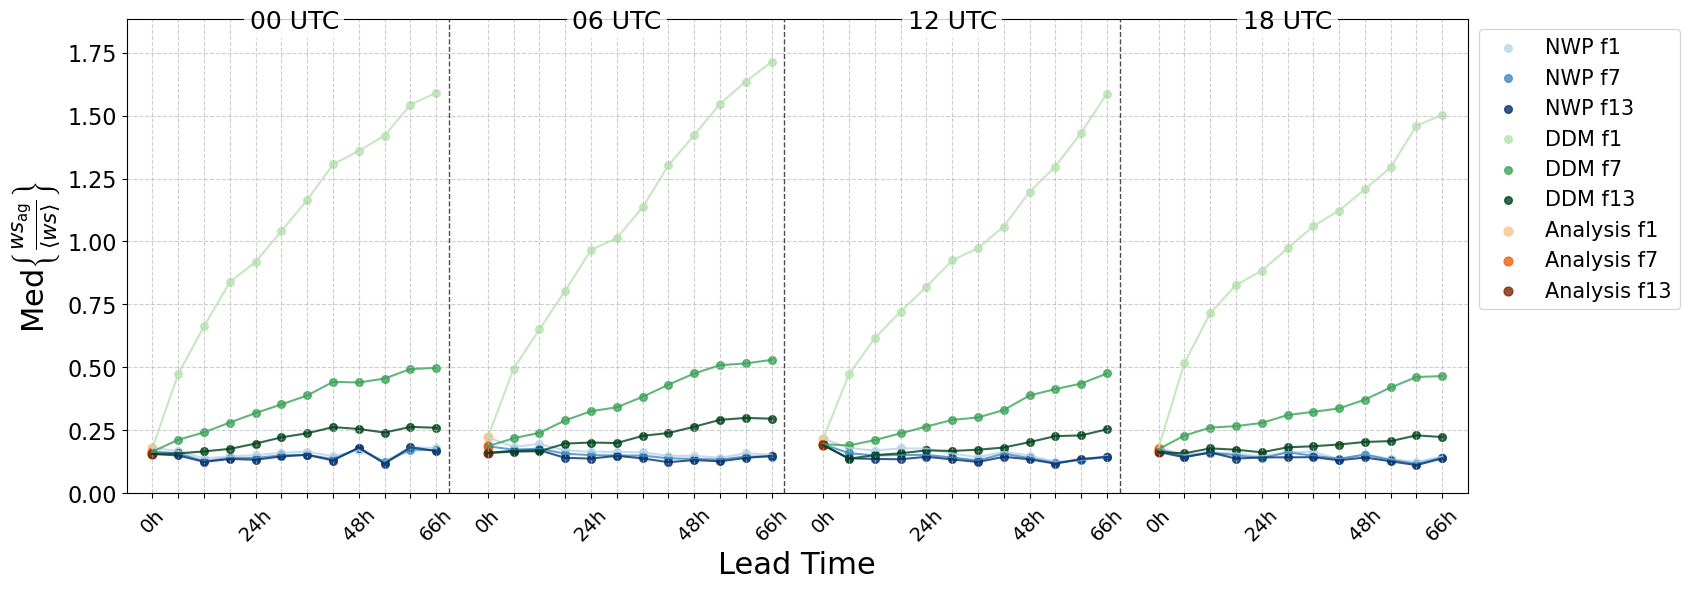

In [15]:
results_500_NWP_list = [results_500_NWP_f1, 
                        results_500_NWP_f7,  
                        results_500_NWP_f13]

results_500_DDM_list = [results_500_DDM_f1, 
                        results_500_DDM_f7, 
                        results_500_DDM_f13]

smoothing_factors = ['f1', 'f7', 'f13']

times_ticks_05 = ['00 UTC', '06 UTC', '12 UTC', '18 UTC']

save_path = ""

plot_comparison_NWP_DDM_multiple(results_500_NWP_list, results_500_DDM_list, labels_for_graph_comparison, 'median', 500, times_ticks_05, labels_semplified, smoothing_factors, save_path)
